# GGplot Recipes
Recipes for Explodatory Data Analysis by means of plots

- toc: true 
- badges: true
- comments: false
- categories: [r]


Warning message in melt.data.table(dt):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [id, ...]. Consider providing at least one of 'id' or 'measure' vars in future."


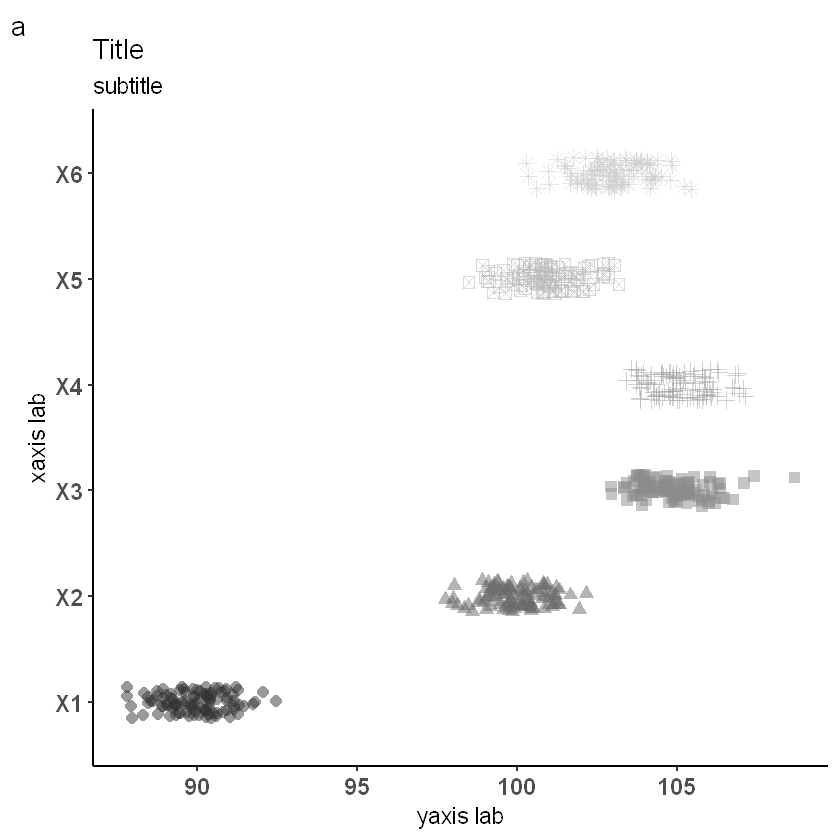

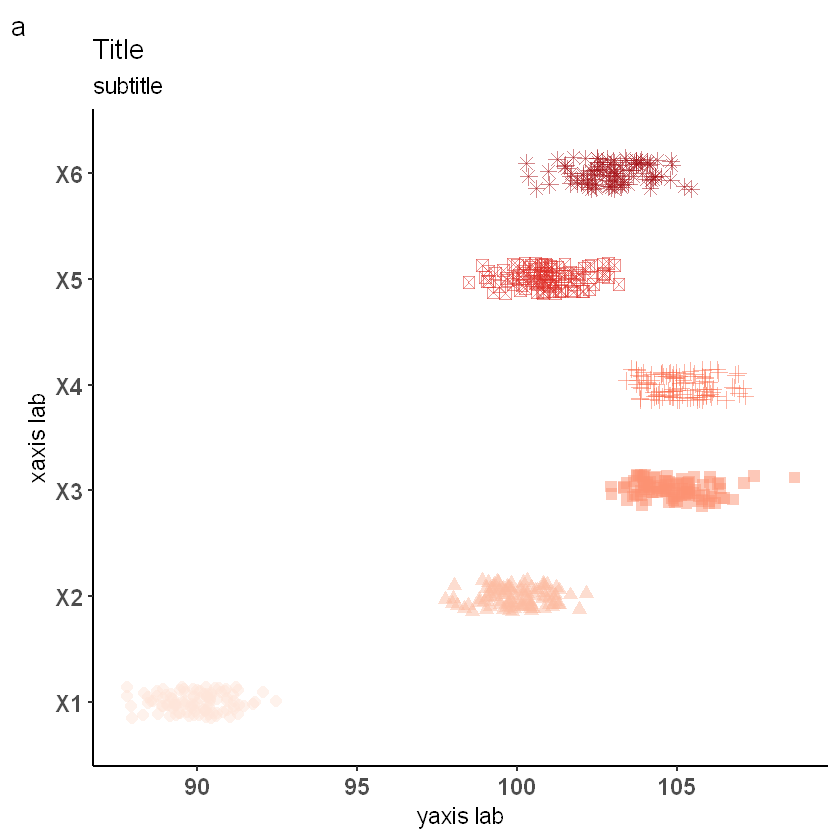

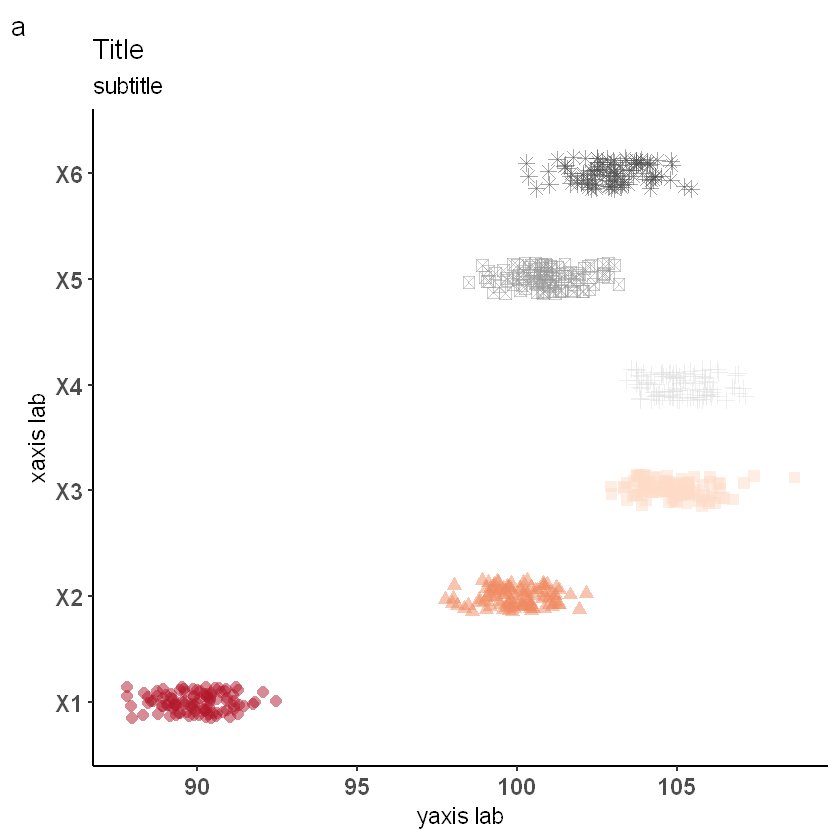

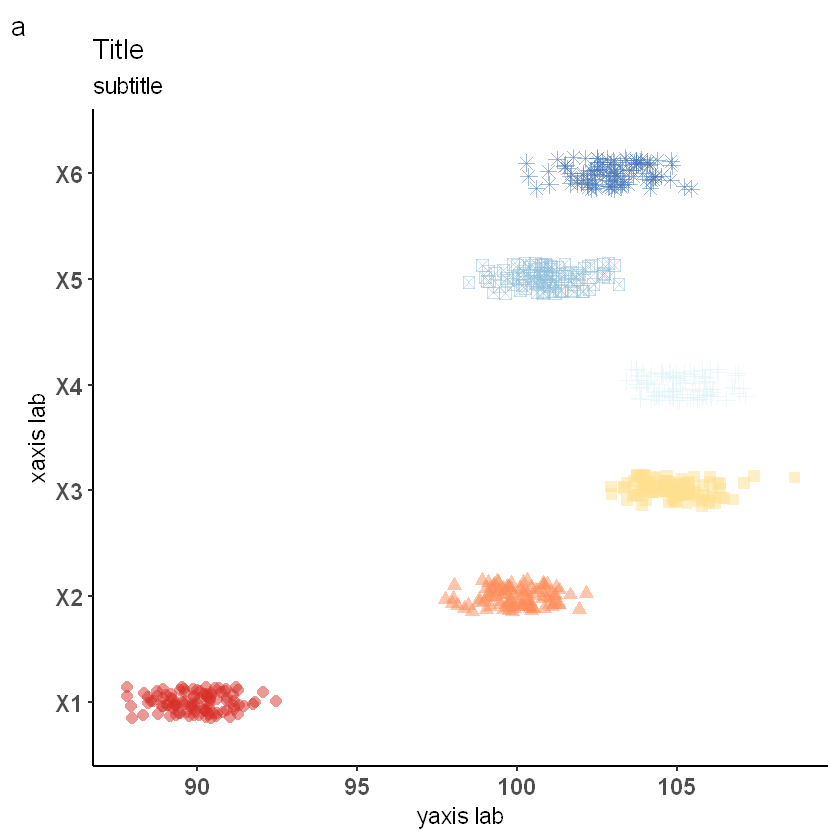

In [2]:
# loading libraries
library(ggplot2)
library(gridExtra)
library(data.table)
library(RColorBrewer)
library(ggpubr)
library(rstatix)
library(ggrepel)



genDataset <- function(number_of_rows,means,sds)
{
l <- length(means)
res <- lapply(seq(1:l),function(x) eval(parse(text=paste("rnorm(",number_of_rows,",",means[x],")",sep="")))) 
data.frame((sapply(res,c)))
return(res)
}

dat <- genDataset(number_of_rows=100,means=c(90,100,105,105,101,103),sds=c(30,20,25,30,30,30))
dat <- data.frame((sapply(dat,c)))
id <- rownames(dat)
dat <-  cbind(id=id,dat)
dt <- data.table(dat)
#we rearrange our table using melt
dt.melt <- melt(dt)
colnames(dt.melt) <- c("id","category","var1")


base <- ggplot(dt.melt, aes(x=category, y=var1)) +
		labs(title = "Title",
			 x     = "xaxis lab",
             y     = "yaxis lab",
             subtitle = "subtitle",
             tag = "a")     				 +
		     theme_classic(base_size = 14)		 +
			 theme(legend.position = "none",
			 axis.text.x = element_text(size=14,face="bold"),
			 axis.text.y = element_text(size=14,face="bold"))
			 
pv  <- base + geom_jitter(
			 position = position_jitter(0.15),
			 alpha=0.5,, size = 3) 

ph  <- pv + coord_flip() 
pvc <- pv + aes(shape = category)			
phc <- pvc + coord_flip() 


pvc_grey 	   <- pvc + aes(color = category) + 	scale_color_grey()
pvc_sequential  <- pvc + aes(color = category) + 	scale_color_brewer(palette="Reds")
pvc_diverging   <- pvc + aes(color = category) + 	scale_color_brewer(palette="RdGy")
pvc_qualitative <- pvc + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")


phc_grey 	   <- phc + aes(color = category) + 	scale_color_grey()
phc_sequential  <- phc + aes(color = category) + 	scale_color_brewer(palette="Reds")
phc_diverging   <- phc + aes(color = category) + 	scale_color_brewer(palette="RdGy")
phc_qualitative <- phc + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")

phc_grey
phc_sequential 
phc_diverging
phc_qualitative
